In [127]:
# Generate data
n = 500
p = 2
y = c(rep(0,n/2),rep(1,n/2))
x_class1 = matrix(rnorm(n/2*p),n/2,p)-1
x_class2 = matrix(rnorm(n/2*p),n/2,p)+1
x = rbind(x_class1,x_class2)
data = as.data.frame(cbind(y,x))
names(data) = c("y",paste("x",1:p,sep=""))

In [146]:
mylogistic <- function(y,x,method="Hessian"){
  maxIter = 500
  n = dim(x)[1]
  p = dim(x)[2]
  
  x = cbind(matrix(1,n,1),x)
  XtX = t(x)%*%x
  
  w_old = matrix(0,p+1,1)
  prob = 1/(1+exp(-x%*%w_old))

   for (iter in 1:maxIter){
        if (method == "Hessian"){
          R = prob*(1-prob)
          temp = matrix(rep(sqrt(R),p+1),n,p+1)*x
          XRX = t(temp)%*% temp
            # Newton-Raphson update
          w = w_old + solve(XRX)%*%(t(x)%*%(y-prob)) 
        }
        else{
            # This is a method using the upper bound of Hessian
            # Because prob*(1-prob) <= 0.25
            # We replace prob*(1-prob) by 0.25
          z =  0.25*x%*%w_old + (y-prob);
          w = solve(0.25*XtX)%*%(t(x)%*%z);
        }
     if (max(abs(w_old-w))/sqrt(sum(w^2)) < 1e-6){
       break
     }
     prob = 1/(1+exp(-x%*%w))
     prob[prob>0.999] = 0.999
     prob[prob<0.001] = 0.001
  
     w_old = w
  }
  return(list(prob=prob,w=w,Iter = iter)) 
}

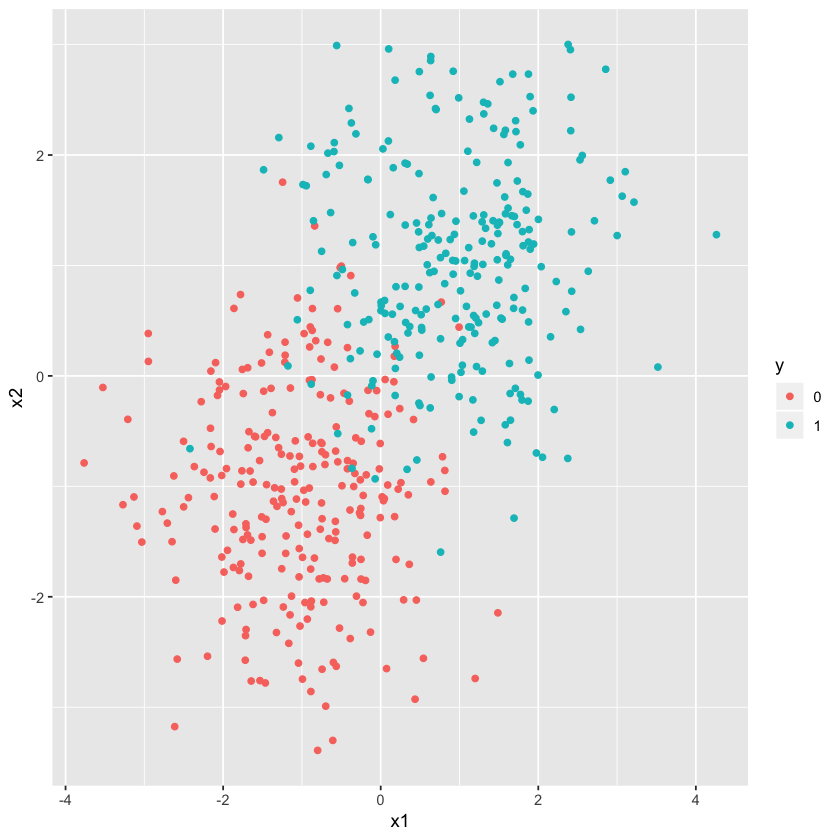

In [129]:
library(ggplot2)
data$y=as.factor(data$y)
qplot(x=x1, y=x2, data=data, color=y)

In [130]:
glm.fit = glm(y~x1+x2,family = "binomial",data=data)

In [131]:
summary(glm.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial", data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.674  -0.140   0.000   0.140   3.732  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.2125     0.2077   1.023    0.306    
x1            2.3489     0.3079   7.629 2.36e-14 ***
x2            2.2608     0.2731   8.278  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 693.15  on 499  degrees of freedom
Residual deviance: 160.98  on 497  degrees of freedom
AIC: 166.98

Number of Fisher Scoring iterations: 7


In [149]:
my.fit<- mylogistic(y=as.numeric(data$y)-1,x=as.matrix(data[,2:3]),method="Hessian")
my.fit$w
my.fit$Iter

,0.2149437
x1,2.3715664
x2,2.2796811


[1] 11

In [152]:
# A failed case
# Generate data
n = 500
p = 2
y = c(rep(0,n/2),rep(1,n/2))
x_class1 = matrix(rnorm(n/2*p),n/2,p)-3
x_class2 = matrix(rnorm(n/2*p),n/2,p)+3
x = rbind(x_class1,x_class2)
data = as.data.frame(cbind(y,x))
names(data) = c("y",paste("x",1:p,sep=""))

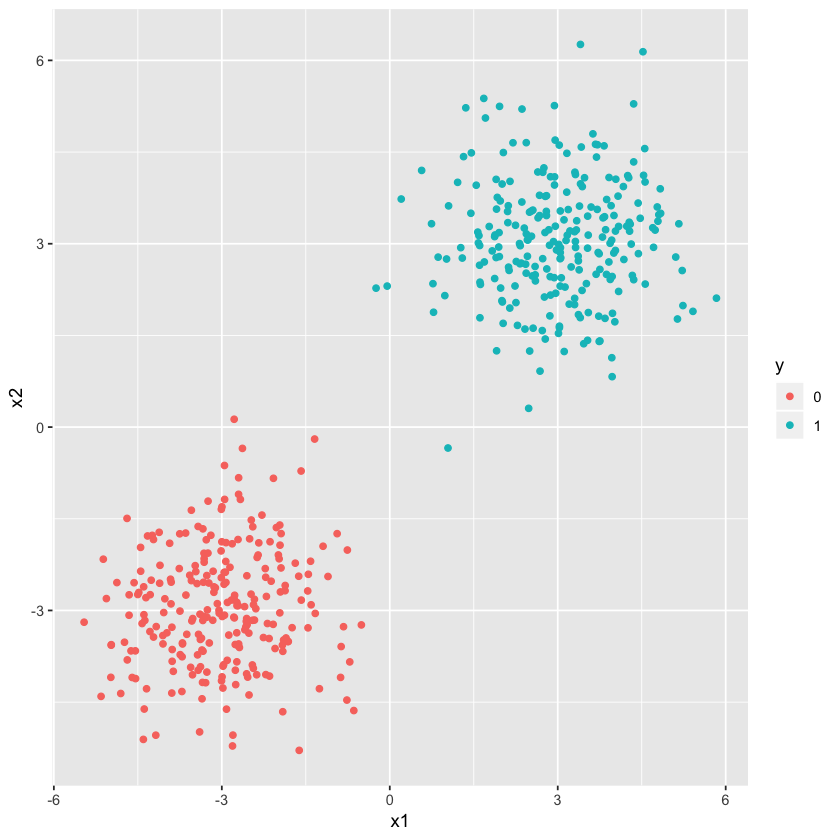

In [153]:
library(ggplot2)
data$y=as.factor(data$y)
p<- ggplot(data=data, aes(x=x1, y=x2,color=y))+ geom_point()
p

In [154]:
glm.fit = glm(y~x1+x2,family = "binomial",data=data)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [155]:
summary(glm.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial", data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.095e-04  -2.100e-08   0.000e+00   2.100e-08   8.631e-05  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)    5.254   7521.044   0.001    0.999
x1            16.850   6475.051   0.003    0.998
x2             8.043   4794.864   0.002    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9315e+02  on 499  degrees of freedom
Residual deviance: 2.3809e-08  on 497  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 25


In [156]:
my.fit<- mylogistic(y=as.numeric(data$y)-1,x=as.matrix(data[,2:3]))
my.fit$w
my.fit$Iter

,-2.286902
x1,74.919516
x2,83.286012


[1] 500

In [157]:
library(MASS)
lda.fit<- lda(y~x1+x2,data=data)
lda.fit

Call:
lda(y ~ x1 + x2, data = data)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
         x1        x2
0 -3.024996 -2.947865
1  2.992729  3.058255

Coefficients of linear discriminants:
         LD1
x1 0.6328210
x2 0.7217696

In [158]:
lda.pred=predict(lda.fit, data)
names(lda.pred)
head(lda.pred$posterior)
tail(lda.pred$posterior)
#head(lda.pred$x)

[1] "class"     "posterior" "x"

,0,1
1,1,1.110932e-14
2,1,2.015620e-15
3,1,1.835789e-13
4,1,7.405598e-14
5,1,2.629448e-15
6,1,4.613687e-12


,0,1
495,5.308684e-16,1
496,9.492127e-11,1
497,6.188348e-12,1
498,2.169668e-10,1
499,4.203737e-15,1
500,5.944056e-15,1
